# 경계 박스(Bounding Box)
---

### Bounding Box 데이터셋
**📍 방법 1**: [labelImg exe](https://github.com/heartexlabs/labelImg/releases)<br>
1. 압축 풀기<br>
2. `.exe` 파일 실행하기<br>
  2-1. `Open Dir` 디렉토리: 이미지 파일 선택<br>
  2-2. `Change Save Dir` 디렉토리: 이미지 파일 선택<br>
  2-3. `PascalVOC` 확인: PascalVOC 형태(YOLO 형태도 있음)<br>
  2-4. `Create\nRectBox`: BoundingBox 그리기<br>
  2-5. `labelImg` 이름 지정: 예를 들면 cat<br>
  2-6. `Save`: xml 파일이 저장됨(jpg 파일이 있는 dir에 저장됨)<br>
  - 생성된 xml 파일: xmin, ymin, xmax, ymax 정보 파싱 후 y 데이터 생성

|단축키|설명|
|:--:|:--:|
|Ctrl + u	|Load all of the images from a directory|
|Ctrl + r	|Change the default annotation target dir|
|Ctrl + s	|Save|
|Ctrl + d	|Copy the current label and rect box|
|Ctrl + Shift + d	|Delete the current image|
|Space	|Flag the current image as verified|
|w	|Create a rect box|
|d	|Next image|
|a	|Previous image|
|del	|Delete the selected rect box|
|Ctrl++	|Zoom in|
|Ctrl--	|Zoom out|
|↑→↓←	|Keyboard arrows to move selected rect box|

**📍 방법 2**: [BoundingBox Tool](https://roboflow.com/)

**방법 1: zip 파일을 다운로드하여 경계 박스(Bounding Box) 만들기**

In [ ]:
# https://drive.google.com/uc?id=1jNlnTFMzxaxZ799JcvVnN_aHsx1O3OeL

# 고양이 얼굴 검출
---

### 필요한 라이브러리 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### 데이터 준비

In [ ]:
# !gdown https://drive.google.com/uc?id=1-RBvPOYycsSpS7rVP0Pqwcbh18lZYDeb

In [ ]:
# !unzip BBRegression.zip

In [ ]:
import glob
import xml.etree.ElementTree as ET

In [ ]:
def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            bbx = member.find('bndbox')
            xmin = int(bbx.find('xmin').text)
            ymin = int(bbx.find('ymin').text)
            xmax = int(bbx.find('xmax').text)
            ymax = int(bbx.find('ymax').text)
            label = member.find('name').text

            value = (root.find('filename').text, 
                     int(root.find('size')[0].text), 
                     int(root.find('size')[1].text), 
                     label, 
                     xmin, 
                     ymin, 
                     xmax, 
                     ymax)            
            xml_list.append(value)

    column_name = ['filename', 'width', 'height', 
                   'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df

In [ ]:
IMAGE_PATH = 'BBRegression'

In [ ]:
import os

In [ ]:
FILE_NAME = 'label_cats.csv'
csv_path = os.path.join(IMAGE_PATH, 'train')
xml_df = xml_to_csv(csv_path)
xml_df.head(10)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,cat-211_jpg.rf.f399ed23be3ee5f430b0c4f93cbb87e...,224,224,cat,24,17,199,106
1,cat-239_jpg.rf.ea1245d88c8a12f3f5d2d10ba89b839...,224,224,cat,46,30,142,152
2,cat-12_jpg.rf.bfc2a9bc1a04c12ee608bb6f221971d6...,224,224,cat,58,19,132,111
3,cat-209_jpg.rf.eb55a5cd6239c981437b709021b0520...,224,224,cat,8,11,96,161
4,cat-181_jpg.rf.e09964d5292e4128ef99db46b0b352c...,224,224,cat,47,9,207,125
5,cat-208_jpg.rf.877db965d79d0252a5026841b3f23da...,224,224,cat,42,9,201,171
6,cat-283_jpg.rf.c4764b12c8af961b92aaf7676f08226...,224,224,cat,8,9,69,141
7,cat-122_jpg.rf.f191c6eca98a6d3a361d47722a29bf8...,224,224,cat,84,3,209,102
8,cat-274_jpg.rf.9dba76b073427ed1ed06c7223cae9eb...,224,224,cat,48,28,126,134
9,cat-194_jpg.rf.1e4d08754ccb1a13358d92822470d6f...,224,224,cat,23,12,183,174


In [ ]:
# DataFrame 저장
xml_df.to_csv(FILE_NAME)

In [ ]:
xml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  91 non-null     object
 1   width     91 non-null     int64 
 2   height    91 non-null     int64 
 3   class     91 non-null     object
 4   xmin      91 non-null     int64 
 5   ymin      91 non-null     int64 
 6   xmax      91 non-null     int64 
 7   ymax      91 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 5.8+ KB


In [ ]:
images = xml_df.iloc[:, 0].values # numpy.ndarray
images[:5]

array(['cat-211_jpg.rf.f399ed23be3ee5f430b0c4f93cbb87e3.jpg',
       'cat-239_jpg.rf.ea1245d88c8a12f3f5d2d10ba89b839c.jpg',
       'cat-12_jpg.rf.bfc2a9bc1a04c12ee608bb6f221971d6.jpg',
       'cat-209_jpg.rf.eb55a5cd6239c981437b709021b0520a.jpg',
       'cat-181_jpg.rf.e09964d5292e4128ef99db46b0b352c7.jpg'],
      dtype=object)

In [ ]:
points = xml_df.iloc[:, 4:].values # numpy.ndarray
points[:4]

array([[ 24,  17, 199, 106],
       [ 46,  30, 142, 152],
       [ 58,  19, 132, 111],
       [  8,  11,  96, 161]])

- 시각화

In [ ]:
import PIL

In [ ]:
dataset_images = []
dataset_bbs = []

for file, point in zip(images, points):
    f = os.path.join(IMAGE_PATH, 'train', file)
    image = PIL.Image.open(f)
    arr = np.array(image)
    dataset_images.append(arr)
    dataset_bbs.append(point)

dataset_images = np.array(dataset_images)
dataset_bbs = np.array(dataset_bbs)

In [ ]:
# (batch_dim, ), (batch_dim, boundingbox)
print(dataset_images.shape, dataset_bbs.shape)

(91, 224, 224, 3) (91, 4)


In [ ]:
dataset_images.shape

(91, 224, 224, 3)

In [ ]:
import cv2

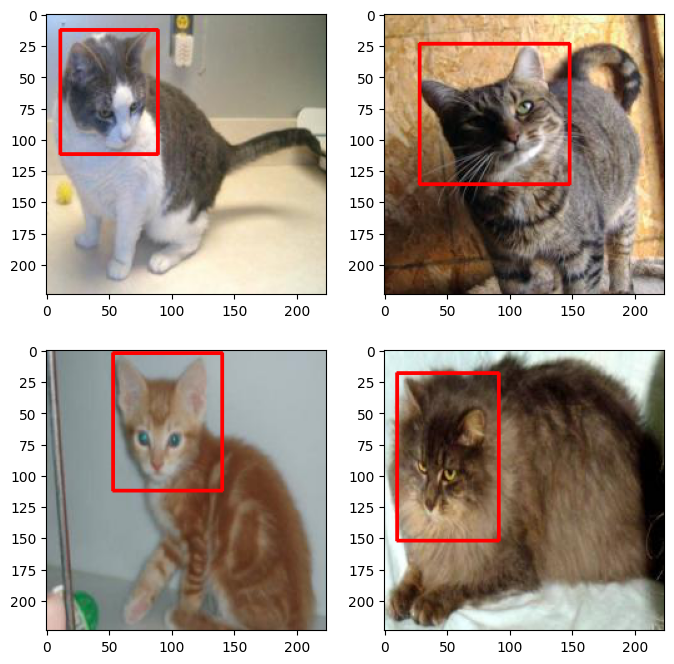

In [ ]:
samples = np.random.randint(dataset_images.shape[0], size=4)

plt.figure(figsize=(8, 8))
for i, idx in enumerate(samples):
    points = dataset_bbs[idx].reshape(2, 2)
    img = cv2.rectangle(dataset_images[idx].copy(), 
                        tuple(points[0]), 
                        tuple(points[1]), 
                        color=(255, 0, 0), 
                        thickness=2) # 이미지에 bounding box 그리기
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
plt.show()

In [ ]:
# 여러 개의 ndarray 저장
np.savez('cat_bbs.npz', 
         image=dataset_images, 
         bbs=dataset_bbs)

In [ ]:
dataset = np.load('cat_bbs.npz')

X = dataset['image']
y = dataset['bbs']

print(X.shape, y.shape)

(91, 224, 224, 3) (91, 4)


### 데이터 분리
- 학습 데이터
- 검증 데이터

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

print(X_train.shape, X_val.shape)

(72, 224, 224, 3) (19, 224, 224, 3)


- 정규화

In [ ]:
X_train = X_train.astype('float32')/255.
X_val = X_val.astype('float32')/255.

In [ ]:
y_train = y_train.astype('float32')
y_val = y_val.astype('float32')

### 모델링(Modeling)

In [ ]:
from tensorflow.keras.applications import MobileNetV2

In [ ]:
base = MobileNetV2(input_shape=(224, 224, 3), 
                   include_top=False, 
                   weights='imagenet')
base.trainable = False

model = keras.Sequential([
    base, 
    layers.Flatten(), 
    layers.Dense(128, activation='relu'), 
    layers.Dense(64, activation='relu'), 
    layers.Dense(4)
])

model.compile(
    optimizer='adam', 
    loss='mse', 
    metrics=['mse']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 128)               8028288   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 10,294,788
Trainable params: 8,036,804
Non-trainable params: 2,257,984
_____________________________________

### 학습(Training)

In [ ]:
ckpt_path = './ckpt/cats_bbs.ckpt'

ckpt_cb = tf.keras.callbacks.ModelCheckpoint(
    ckpt_path, 
    save_weights_only=True, 
    save_best_only=True, 
    monitor='val_loss', 
    verbose=1
)

In [ ]:
EPOCHS = 30
BATCH_SIZE = 16

log = model.fit(X_train, y_train, 
                epochs=EPOCHS, 
                batch_size=BATCH_SIZE, 
                validation_data=(X_val, y_val), 
                callbacks=[ckpt_cb], 
                verbose=1)

Epoch 1/30
5/5 [==============================] - ETA: 0s - loss: 5817.1211 - mse: 5817.1211
Epoch 1: val_loss improved from inf to 2813.74097, saving model to ./ckpt/cats_bbs.ckpt
5/5 [==============================] - 16s 1s/step - loss: 5817.1211 - mse: 5817.1211 - val_loss: 2813.7410 - val_mse: 2813.7410
Epoch 2/30
5/5 [==============================] - ETA: 0s - loss: 2989.2783 - mse: 2989.2783
Epoch 2: val_loss improved from 2813.74097 to 1410.84424, saving model to ./ckpt/cats_bbs.ckpt
5/5 [==============================] - 5s 1s/step - loss: 2989.2783 - mse: 2989.2783 - val_loss: 1410.8442 - val_mse: 1410.8442
Epoch 3/30
5/5 [==============================] - ETA: 0s - loss: 1117.8932 - mse: 1117.8932
Epoch 3: val_loss did not improve from 1410.84424
5/5 [==============================] - 3s 664ms/step - loss: 1117.8932 - mse: 1117.8932 - val_loss: 1470.9805 - val_mse: 1470.9805
Epoch 4/30
5/5 [==============================] - ETA: 0s - loss: 539.6475 - mse: 539.6475
Epoch 4: 

- 학습 과정 시각화

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.plot(hist['epoch'], hist['mse'], label='Train MSE')
    plt.plot(hist['epoch'], hist['val_mse'], label='Val MSE')
    plt.legend()
    plt.show()

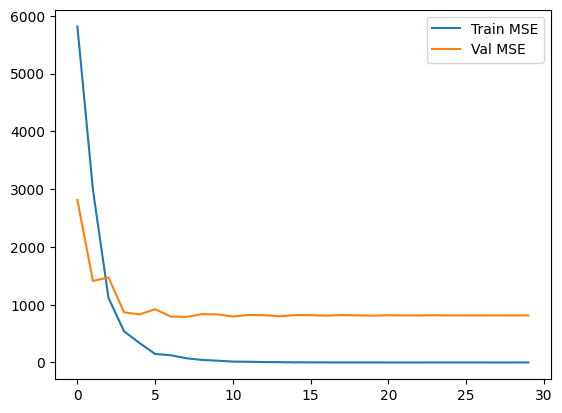

In [ ]:
plot_history(log)

### 평가(Evaluation)

In [ ]:
# best model 불러오기
model.load_weights(ckpt_path)

In [ ]:
model.evaluate(X_val, y_val)

1/1 [==============================] - 1s 715ms/step - loss: 788.7421 - mse: 788.7421


[788.7421264648438, 788.7421264648438]

**모델 저장(Model)**
1. keras 형태
2. tensorflow 형태

In [ ]:
# 1. keras 형태
model.save('cats_bbs_regression.h5')

In [ ]:
my_model = tf.keras.models.load_model('cats_bbs_regression.h5')
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 128)               8028288   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 10,294,788
Trainable params: 8,036,804
Non-trainable params: 2,257,984
_____________________________________

In [ ]:
# 2. tensorflow 형태
model.save('my_cats_model') # 폴더 이름 지정

In [ ]:
your_model = tf.keras.models.load_model('my_cats_model')
your_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 128)               8028288   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 10,294,788
Trainable params: 8,036,804
Non-trainable params: 2,257,984
_____________________________________

### 예측(Prediction)

In [ ]:
import os

In [ ]:
FILE_NAME = 'test_label_cats.csv'

csv_path = os.path.join(IMAGE_PATH, 'test')
xml_df = xml_to_csv(csv_path)
xml_df.head(10)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,cat-144_jpg.rf.50b4b01d0df37d977b1341837708aa1...,224,224,cat,149,63,220,153
1,cat-110_jpg.rf.919d96206faca75068ac5595928f400...,224,224,cat,89,31,209,107
2,cat-268_jpg.rf.942ee4c485010ed238a09f80680dc0b...,224,224,cat,55,2,189,87
3,cat-249_jpg.rf.eba7bf7e8fe79642e84fdc3abc72e6f...,224,224,cat,38,26,174,146
4,cat-255_jpg.rf.750c02515a1b2d898cceae6abf42645...,224,224,cat,15,9,205,196
5,cat-143_jpg.rf.61045dbe235b78c5fdf8d2267b0bea8...,224,224,cat,64,35,221,139
6,cat-273_jpg.rf.af452afbb9bb8767d534653a290090c...,224,224,cat,9,6,130,194
7,cat-123_jpg.rf.9a0878d7d6e110b302293109a66b43b...,224,224,cat,101,23,178,114
8,cat-243_jpg.rf.1da8871668b6d7bbe4a3d5aa11fd046...,224,224,cat,74,10,171,147
9,cat-207_jpg.rf.9634274bd68e49fcd575d53e83e72ca...,224,224,cat,47,3,166,87


In [ ]:
# DataFrame 저장
xml_df.to_csv(FILE_NAME)

- 시각화

In [ ]:
images = xml_df.iloc[:, 0].values # numpy.ndarray
images[:5]

array(['cat-144_jpg.rf.50b4b01d0df37d977b1341837708aa1d.jpg',
       'cat-110_jpg.rf.919d96206faca75068ac5595928f4005.jpg',
       'cat-268_jpg.rf.942ee4c485010ed238a09f80680dc0bc.jpg',
       'cat-249_jpg.rf.eba7bf7e8fe79642e84fdc3abc72e6f2.jpg',
       'cat-255_jpg.rf.750c02515a1b2d898cceae6abf426452.jpg'],
      dtype=object)

In [ ]:
points = xml_df.iloc[:, 4:].values # numpy.ndarray
points[:4]

array([[149,  63, 220, 153],
       [ 89,  31, 209, 107],
       [ 55,   2, 189,  87],
       [ 38,  26, 174, 146]])

In [ ]:
import PIL

In [ ]:
dataset_images = []
dataset_bbs = []

for file, point in zip(images, points):
    f = os.path.join(IMAGE_PATH, 'test', file)
    image = PIL.Image.open(f)
    arr = np.array(image)
    dataset_images.append(arr)
    dataset_bbs.append(point)

dataset_images = np.array(dataset_images)
dataset_bbs = np.array(dataset_bbs)

In [ ]:
# (batch_dim, ), (batch_dim, boundingbox)
print(dataset_images.shape, dataset_bbs.shape)

(11, 224, 224, 3) (11, 4)


In [ ]:
dataset_images[0].shape

(224, 224, 3)

In [ ]:
import cv2

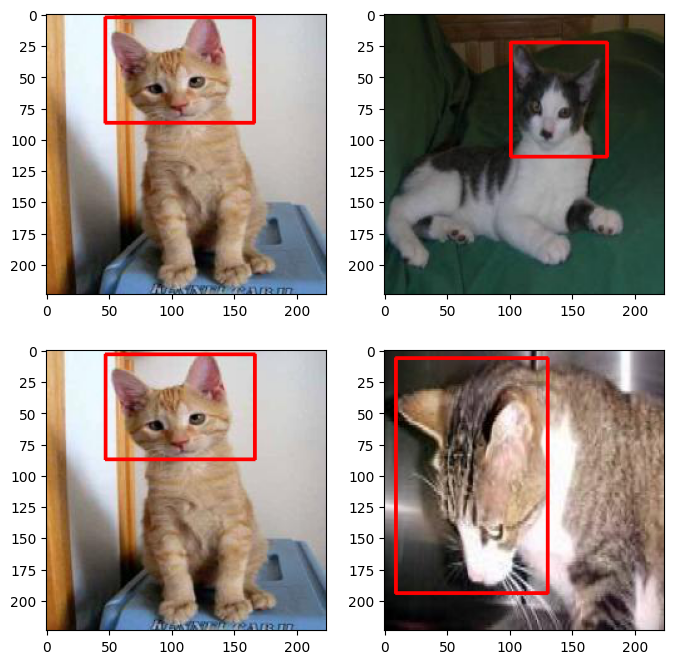

In [ ]:
samples = np.random.randint(dataset_images.shape[0], size=4)

plt.figure(figsize=(8, 8))
for i, idx in enumerate(samples):
    points = dataset_bbs[idx].reshape(2, 2)
    img = cv2.rectangle(dataset_images[idx].copy(), 
                        tuple(points[0]), 
                        tuple(points[1]), 
                        color=(255, 0, 0), 
                        thickness=2) # 이미지에 bounding box 그리기
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
plt.show()

In [ ]:
# 여러 개의 ndarray 저장
np.savez('test_cat_bbs.npz', 
         image=dataset_images, 
         bbs=dataset_bbs)

In [ ]:
dataset = np.load('test_cat_bbs.npz')

X_test = dataset['image']
y_test = dataset['bbs']

print(X_test.shape, y_test.shape)

(11, 224, 224, 3) (11, 4)


In [ ]:
X_test = X_test.astype('float32')/255.

In [ ]:
y_pred = model.predict(X_test)

1/1 [==============================] - 2s 2s/step


In [ ]:
y_pred = y_pred.astype('int')

In [ ]:
import cv2

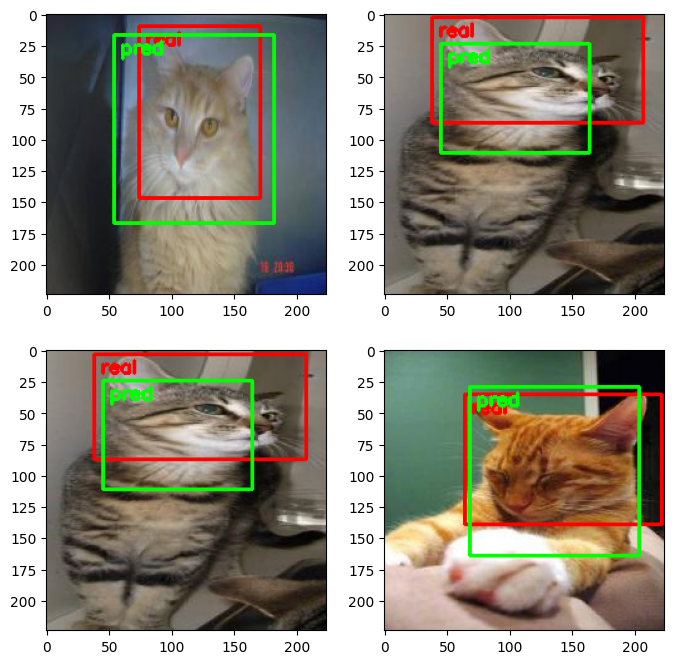

In [ ]:
samples = np.random.randint(X_test.shape[0], size=4)

plt.figure(figsize=(8, 8))
for i, idx in enumerate(samples):
    points = y_test[idx].reshape(2, 2)
    p_points = y_pred[idx].reshape(2, 2)
    img = (X_test[idx].copy()* 255).astype(np.uint8)
    # test bounding box
    cv2.rectangle(img, tuple(points[0]), tuple(points[1]), color=(255, 0, 0), thickness=2)
    cv2.putText(img, 'real', (tuple(points[0])[0] + 5, tuple(points[0])[1] + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)
    # predict bounding box
    cv2.rectangle(img, tuple(p_points[0]), tuple(p_points[1]), color=(0, 255, 0), thickness=2)
    cv2.putText(img, 'pred', (tuple(p_points[0])[0] + 5, tuple(p_points[0])[1] + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
plt.show()

In [ ]:
def draw_bbox(img, points, label, color):
    p1 = tuple(points[0])
    p2 = tuple(points[1])
    cv2.rectangle(img, p1, p2, color=color, thickness=1)
    size = cv2.getTextSize(label, cv2.FONT_HERSHEY_PLAIN, fontScale=1, thickness=1)[0]
    
    p2 = p1[0] + size[0] + 3, p1[1] + size[1] + 4
    cv2.rectangle(img, p1, p2, color=color, thickness=-1)
    cv2.putText(img, label, (p1[0], p1[1] + size[1] + 4), 
                cv2.FONT_HERSHEY_PLAIN, fontScale=1, color=(255, 255, 255), thickness=1)
    return img

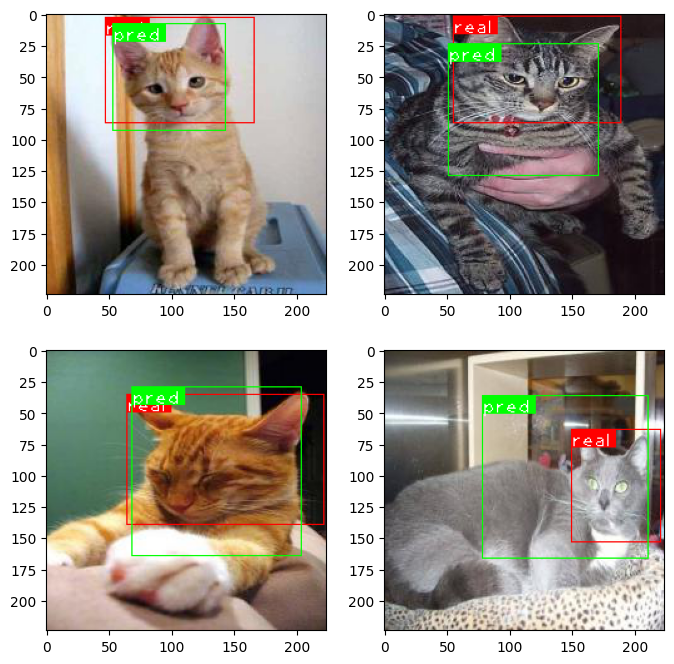

In [ ]:
samples = np.random.randint(X_test.shape[0], size=4)

plt.figure(figsize=(8, 8))
for i, idx in enumerate(samples):
    img = (X_test[idx].copy()* 255).astype(np.uint8)
    test_points = y_test[idx].reshape(2, 2)
    pred_points = y_pred[idx].reshape(2, 2)
    img1 = draw_bbox(img, test_points, 'real', (255, 0, 0))
    img2 = draw_bbox(img1, pred_points, 'pred', (0, 255, 0))
    plt.subplot(2, 2, i+1)
    plt.imshow(img2)
plt.show()